[View in Colaboratory](https://colab.research.google.com/github/mrrajeshreddy/Carvana-Image-Masking/blob/master/ImageSegmentation.ipynb)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras import losses
from tensorflow.keras import models
from tensorflow.keras import backend as K  
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

In [0]:
model_path = './gdrive/My Drive/model/UNET_Keras_weigh.h5'

In [0]:
def dice_coeff(y_true, y_pred):
    smooth = 1.
    # Flatten
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)
    return score
def dice_loss(y_true, y_pred):
    loss = 1 - dice_coeff(y_true, y_pred)
    return loss
def bce_dice_loss(y_true, y_pred):
    loss = losses.binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)
    return loss

In [0]:
model = models.load_model(model_path, custom_objects={'bce_dice_loss': bce_dice_loss, 
                                                      'dice_loss': dice_loss,
                                                      'dice_coeff': dice_coeff
                                                      })

In [5]:
input_shape = model.input_shape
input_shape

(None, 256, 256, 3)

In [0]:
def get_image_segment(image_name, input_shape):
  orig_image = load_img( test_img_path )
  orig_size = orig_image.size
  test_image = orig_image.resize(input_shape, resample=Image.NEAREST)
  test_image =  img_to_array(test_image )
  test_image = test_image / 255
  test_image = np.expand_dims(test_image, 0)
  predict = model.predict(test_image)
  predict_img = array_to_img(predict[0])
  predict_img = predict_img.resize(orig_size)
  return orig_image, predict_img

In [0]:
test_img_path = "./gdrive/My Drive/TestFiles/new_car.jpg" #@param

In [0]:
image, segment = get_image_segment(test_img_path, input_shape[1:3])

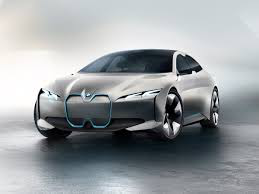

In [9]:
image

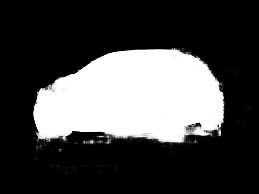

In [10]:
segment